# Algorithmic Trading Strategy (Bollinger Bands)

## Before we start, let's go through the theory behind this strategy.

### The backing of this strategy revolves around the assumption that the prices of non-derivative assets will trade in a normal distribution. This means that when an asset price’s stock moves greater than 2 standard deviations away from its normal range, it can be considered an outlier that must be traded against.

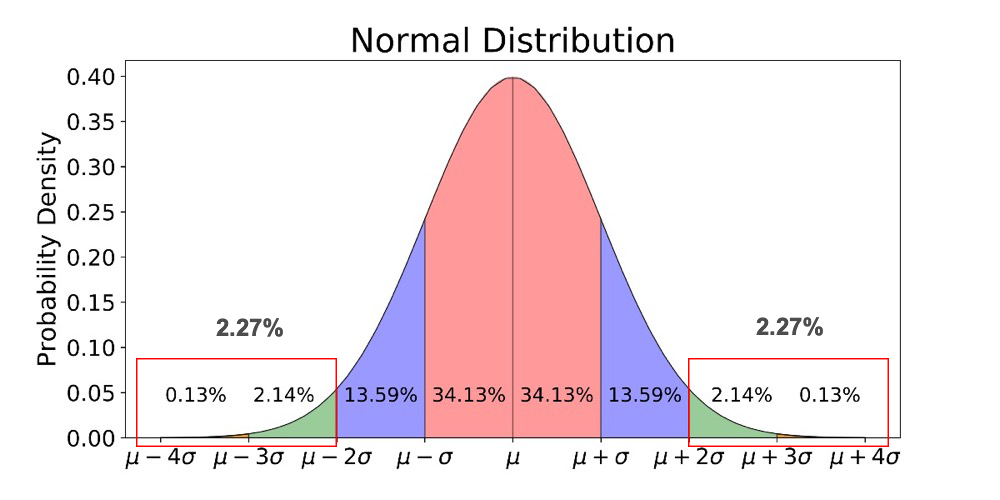

## For Example: If the standard deviation of the close price is larger than +2 , then you should Sell your stock and if the standard deviation of the close price is less than -2 , then you should Buy more.

# 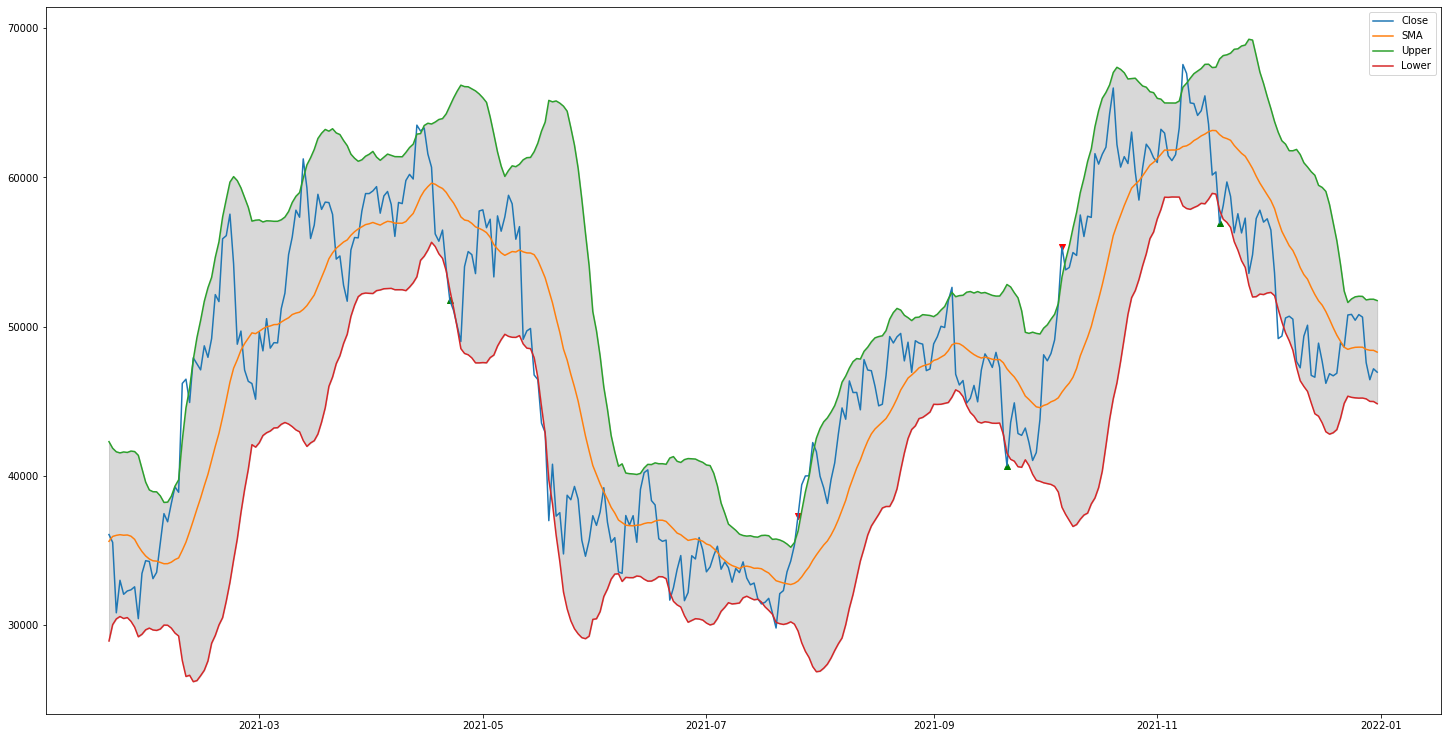

# -------------------------------------------------------------------------

# Bitcoin Price
## Get Bitcoin Data from yfinance (every day for 1 year)

In [1]:
import yfinance as yf
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

data = yf.download(tickers = ('SHOP'), 
                   period = '1y', 
                   interval = '1d',
                   auto_adjust = True)
df = pd.DataFrame(data)
df


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2021-01-15,1190.160034,1193.000000,1147.000000,1170.469971,893300
2021-01-19,1186.900024,1190.660034,1150.170044,1173.969971,776500
2021-01-20,1180.709961,1216.319946,1175.345947,1200.979980,811900
2021-01-21,1214.000000,1216.250000,1181.000000,1198.150024,701100
2021-01-22,1187.520020,1201.609985,1177.156006,1196.699951,624700
...,...,...,...,...,...
2022-01-10,1117.010010,1133.229980,1064.020020,1131.170044,2112600
2022-01-11,1097.000000,1165.979980,1086.010010,1157.310059,1262600
2022-01-12,1185.160034,1191.199951,1157.000000,1168.760010,1132900


In [2]:
## Simple Moving Average (SMA) for 20 days
df['SMA'] = df.Close.rolling(window=30).mean()

## standard deviations for 20 days
df['stddev'] = df.Close.rolling(window=30).std()

## Upper is 2 standard deviations above SMA and Lower is 2 standard deviations below SMA
df['Upper'] = df.SMA + 0.6 * df.stddev
df['Lower'] = df.SMA - 0.6 * df.stddev

## Generate the Buy_signal and Sell_signal based on the strategy
df['Buy_signal'] = np.where(df.Close < df.Lower, True, False)
df['Sell_signal'] = np.where(df.Close > df.Upper, True, False)

## Remove nan value
df = df.dropna()
df

,Open,High,Low,Close,Volume,SMA,stddev,Upper,Lower,Buy_signal,Sell_signal
Date,,,,,,,,,,,
2021-03-01,1315.000000,1330.000000,1281.000000,1309.939941,1269800,1282.227995,119.267304,1353.788377,1210.667612,False,False
2021-03-02,1317.790039,1317.790039,1255.000000,1309.060059,1276100,1286.847664,117.459585,1357.323415,1216.371914,False,False
2021-03-03,1288.339966,1299.989990,1218.349976,1220.300049,1156300,1288.392000,116.222368,1358.125421,1218.658579,False,False
2021-03-04,1199.920044,1220.300049,1113.609985,1149.439941,2745200,1286.673999,117.927476,1357.430484,1215.917514,True,False
2021-03-05,1154.969971,1154.969971,1021.570007,1131.010010,3943000,1284.435999,120.279032,1356.603418,1212.268579,True,False
...,...,...,...,...,...,...,...,...,...,...,...
2022-01-10,1117.010010,1133.229980,1064.020020,1131.170044,2112600,1374.722001,113.291471,1442.696884,1306.747118,True,False
2022-01-11,1097.000000,1165.979980,1086.010010,1157.310059,1262600,1361.065002,114.003597,1429.467161,1292.662844,True,False
2022-01-12,1185.160034,1191.199951,1157.000000,1168.760010,1132900,1349.297335,115.056525,1418.331250,1280.263420,True,False


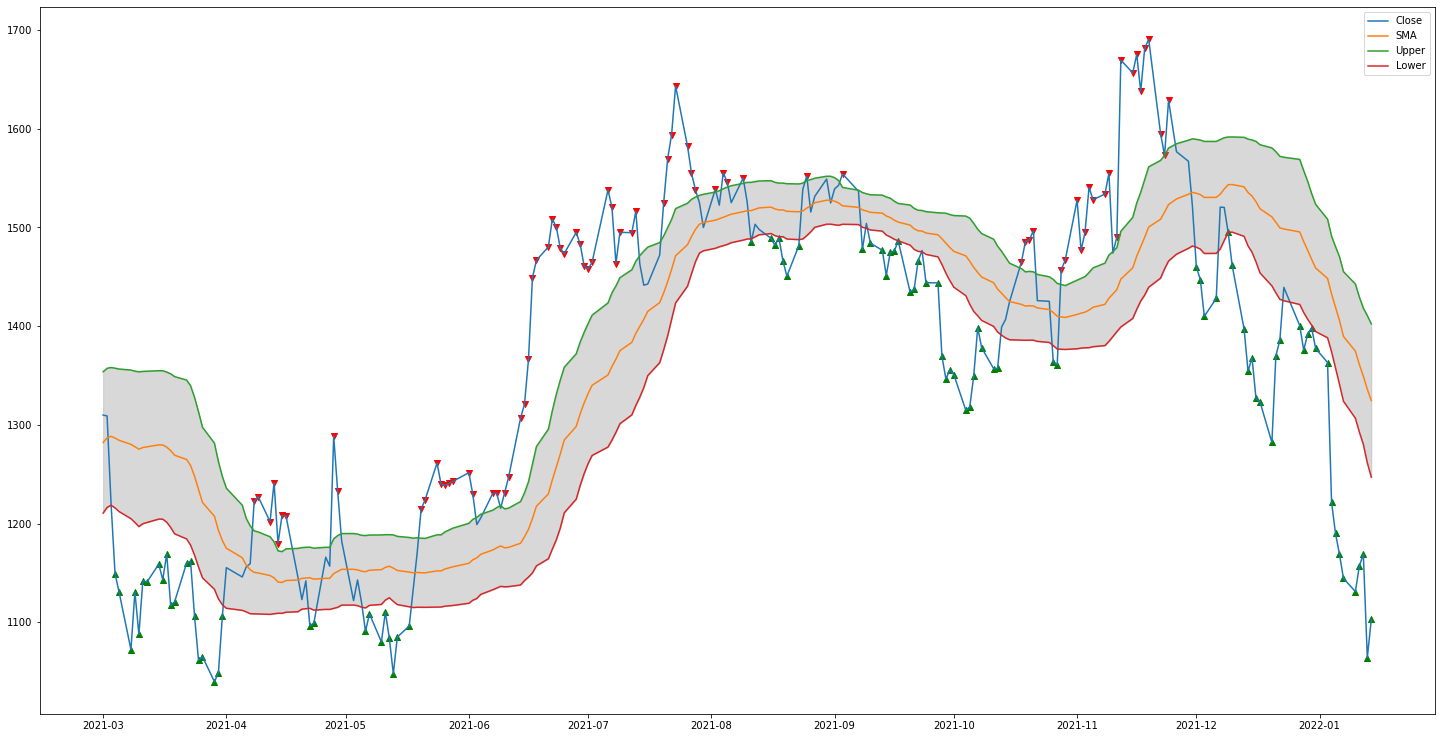

In [3]:
## plot figure size 
plt.figure(figsize= (25,13))

## plot 4 lines
plt.plot(df[['Close', 'SMA', 'Upper', 'Lower']])

## plot Buy and Sell scatter to our visualization
plt.scatter(df.index[df.Buy_signal], df[df.Buy_signal].Close, marker='^', color = 'g')
plt.scatter(df.index[df.Sell_signal], df[df.Sell_signal].Close, marker='v', color = 'r')

## Fill the middle area with grey color
plt.fill_between(df.index, df.Upper, df.Lower, color = 'grey', alpha = 0.3)

## show plot legend
plt.legend(['Close', 'SMA', 'Upper', 'Lower'])

## show plot
plt.show()

# Improve our buy and sell signal (Buy 1 Sell 1)

In [4]:
## Define new lists and stock_on_hand

buy = []
sell = []
stock_on_hand = False

## change multiple buy and sell to only 1 buy and 1 sell

for i in range(len(df)):
    if df.Close[i] < df.Lower[i]:
        if stock_on_hand == False:
            buy.append(i)
            stock_on_hand = True
    elif df.Close[i] > df.Upper[i]:
        if stock_on_hand == True:
            sell.append(i)
            stock_on_hand = False

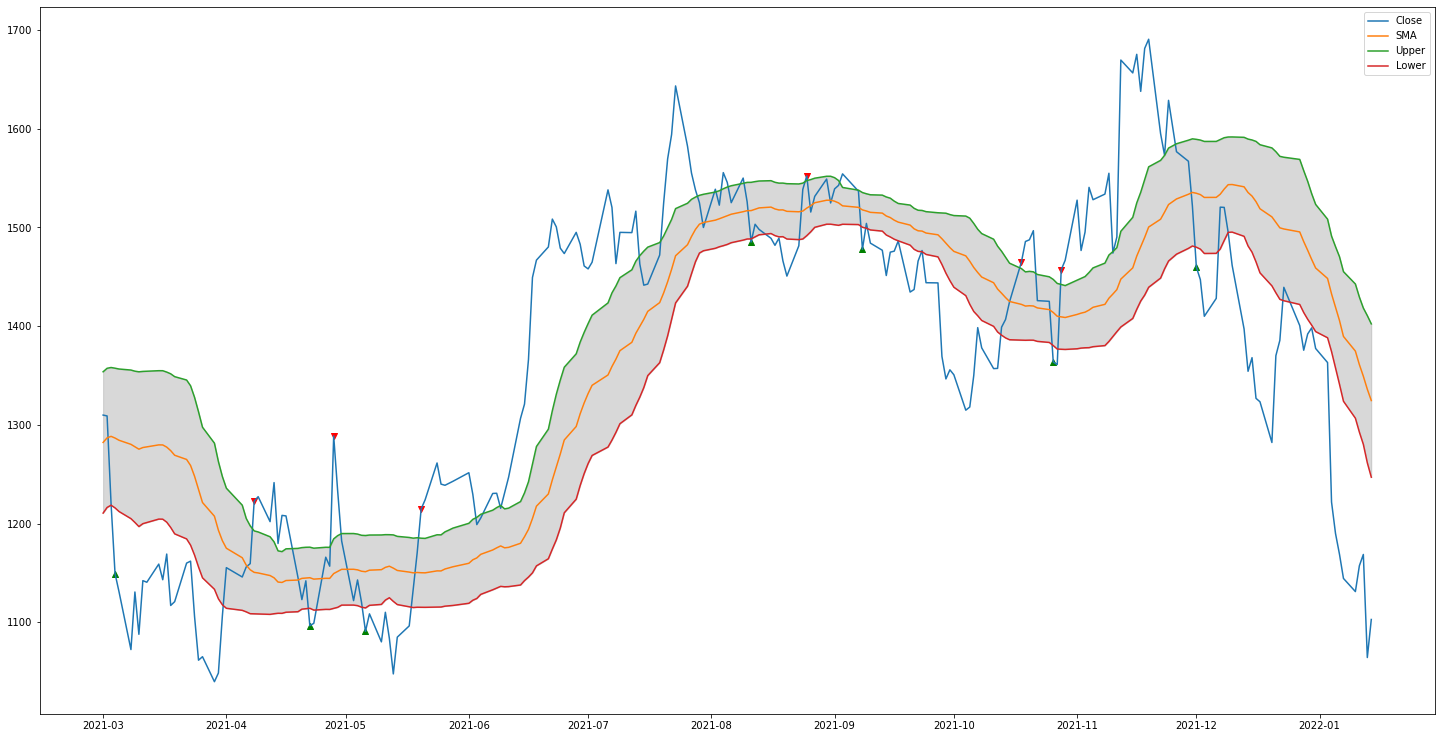

In [5]:
## plot figure size 
plt.figure(figsize= (25,13))

## plot 4 lines
plt.plot(df[['Close', 'SMA', 'Upper', 'Lower']])

## plot Buy and Sell scatter to our visualization
plt.scatter(df.iloc[buy].index, df.iloc[buy].Close, marker='^', color = 'g')
plt.scatter(df.iloc[sell].index, df.iloc[sell].Close, marker='v', color = 'r')

## Fill the middle area with grey color
plt.fill_between(df.index, df.Upper, df.Lower, color = 'grey', alpha = 0.3)

## show plot legend
plt.legend(['Close', 'SMA', 'Upper', 'Lower'])

## show plot
plt.show()

# Check if you can make profit based on this strategy

In [6]:
share = 1000
profit = 0

for i in range(len(sell)):
    
    profit = profit - (df.iloc[buy[i]].Close * share)
    profit = profit + (df.iloc[sell[i]].Close * share)
    
profit

536989.990234375